In [126]:
import numpy as np
import re
import matplotlib.pyplot as plt

# read in the text file
with open('Kritias.txt') as f:
    lines = f.readlines()

def show_char_distribution(lines):
    # get histogram of the characters
    frequency_table = {}
    for line in lines:
        for c in line:
            if c in frequency_table:
                frequency_table[c] += 1
            else:
                frequency_table[c] = 1

    # print characters in order of frequency
    for c in sorted(frequency_table, key=frequency_table.get, reverse=True):
        print(c, frequency_table[c])

show_char_distribution(lines)

  7547
e 4345
t 3202
a 2719
n 2490
o 2410
h 2271
i 2122
s 2048
r 2013
d 1538
l 1231
u 912
f 846
c 814
w 809
m 739
g 628
y 602
, 567
p 491
b 438
v 351
. 191
k 142
I 86
A 83
T 79
; 74

 64
x 55
S 36
E 34
q 33
z 31
C 29
: 27
H 26
M 21
O 20
R 17
- 17
j 16
— 14
P 13
W 11
F 11
N 11
L 10
B 9
' 5
U 3
? 3
D 3
Z 3
Y 2
G 2
! 1
J 1
V 1


In [127]:
# remove NAME: prefix of lines 
cleaned_lines = []
regex_name_prefix = re.compile(r'[A-Z]+: ')
regex_unwantend = re.compile(r"[,\-'\n]")
regex_other_punctuation = re.compile(r'[:;!?—]')
for line in lines:
        match = regex_name_prefix.match(line)
        if match and line.startswith(match.group()):
            clean_line = line[len(match.group()):]
        else:
            clean_line = line
        # more cleaning
        clean_line = regex_unwantend.sub(' ', clean_line)
        clean_line = regex_other_punctuation.sub('.', clean_line)
        clean_line = clean_line.replace('  ', ' ')
        cleaned_lines.append(clean_line)

show_char_distribution(cleaned_lines)

  7617
e 4345
t 3202
a 2719
n 2490
o 2410
h 2271
i 2122
s 2048
r 2013
d 1538
l 1231
u 912
f 846
c 814
w 809
m 739
g 628
y 602
p 491
b 438
v 351
. 295
k 142
I 79
A 68
T 64
x 55
q 33
z 31
H 21
C 17
S 16
j 16
E 16
M 13
P 13
W 11
F 11
N 11
L 10
O 10
B 9
D 3
Z 3
Y 2
G 2
J 1
V 1


In [128]:
# get list of sentences
sentences = []
for line in cleaned_lines:
    sentences += line.split('.')
sentences = [s.strip().lower() for s in sentences if s.strip()]

for sentence in sentences:
    print(sentence)
    
# get list of words
words = []
for sentence in sentences:
    words += sentence.split()
words = [w.strip().lower() for w in words if w.strip()]
words = list(set(words))
print(words)

how thankful i am socrates that i have arrived at last and like a weary traveller after a long journey may be at rest
and i pray the being who always was of old and has now been by me revealed to grant that my words may endure in so far as they have been spoken truly and acceptably to him
but if unintentionally i have said anything wrong i pray that he will impose upon me a just retribution and the just retribution of him who errs is that he should be set right
wishing then to speak truly in future concerning the generation of the gods i pray him to give me knowledge which of all medicines is the most perfect and best
and now having offered my prayer i deliver up the argument to critias who is to speak next according to our agreement
and i timaeus accept the trust and as you at first said that you were going to speak of high matters and begged that some forbearance might be shown to you i too ask the same or greater forbearance for what i am about to say
and although i very well know t

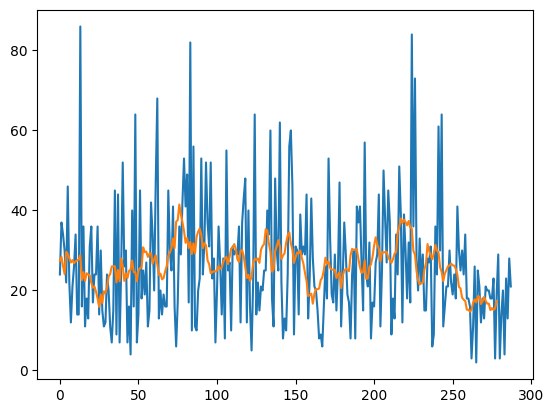

In [129]:
# print sentence length over time
sentence_lengths = [len(s.split()) for s in sentences]
plt.plot(sentence_lengths)
# print rolling average of sentence length
lookback = 10
rolling_average = np.convolve(sentence_lengths, np.ones(lookback)/lookback, mode='valid')
plt.plot(rolling_average)

In [150]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get the list of stopwords
stopwords_list = stopwords.words('english')

# Remove stopwords from your text
filtered_words = [word for word in words if word not in stopwords_list]

# get filtered sentences
filtered_sentences = []
for sentence in sentences:
    filtered_sentence = ' '.join([word for word in sentence.split() if word not in stopwords_list])
    filtered_sentences.append(filtered_sentence)

[nltk_data] Downloading package stopwords to /home/bela/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [131]:
# select which words to use
relevant_words = filtered_words

In [132]:
# get term sentence matrix
term_sentence_matrix = np.zeros((len(relevant_words), len(sentences)))
for k, sentence in enumerate(sentences):
    for i, word in enumerate(relevant_words):
        term_sentence_matrix[i, k] = sentence.count(word)
        
normalized_term_sentence_matrix = np.zeros((len(relevant_words), len(sentences)))
for k in range(len(sentences)):
    normalized_term_sentence_matrix[:,k] = term_sentence_matrix[:,k] / np.linalg.norm(term_sentence_matrix[:,k])


print(term_sentence_matrix.shape)


(1595, 288)


In [133]:
# verify term sentence matrix
sentence_index = 0
print(sentences[sentence_index])

print("----")
for k, word in enumerate(relevant_words):
    if normalized_term_sentence_matrix[k, sentence_index] > 0:
        print(word, normalized_term_sentence_matrix[k, sentence_index])
        

how thankful i am socrates that i have arrived at last and like a weary traveller after a long journey may be at rest
----
last 0.30151134457776363
journey 0.30151134457776363
weary 0.30151134457776363
socrates 0.30151134457776363
like 0.30151134457776363
arrived 0.30151134457776363
rest 0.30151134457776363
long 0.30151134457776363
traveller 0.30151134457776363
thankful 0.30151134457776363
may 0.30151134457776363


In [134]:
# rank reduction by svd
U, s, V = np.linalg.svd(normalized_term_sentence_matrix)
rank = 20
U_rank = U[:, :rank]
s_rank = np.diag(s[:rank])
V_rank = V[:rank, :]
term_sentence_matrix_rank = U_rank @ s_rank @ V_rank
print(term_sentence_matrix_rank)

[[ 0.0001346  -0.00054477 -0.00063437 ... -0.0018651  -0.00127227
   0.00065789]
 [ 0.00083101  0.00295518  0.00104581 ... -0.00036226 -0.00029962
   0.0003929 ]
 [ 0.00274013  0.03401267 -0.00632664 ...  0.00848975  0.02566216
   0.01220468]
 ...
 [-0.00061095  0.0014483  -0.00142349 ...  0.00073094  0.0018232
   0.00029351]
 [-0.00380464  0.00124767 -0.00158859 ...  0.01177434 -0.01056104
  -0.01074635]
 [ 0.00117198 -0.00175188 -0.00062557 ...  0.00085756 -0.0004078
   0.0057824 ]]


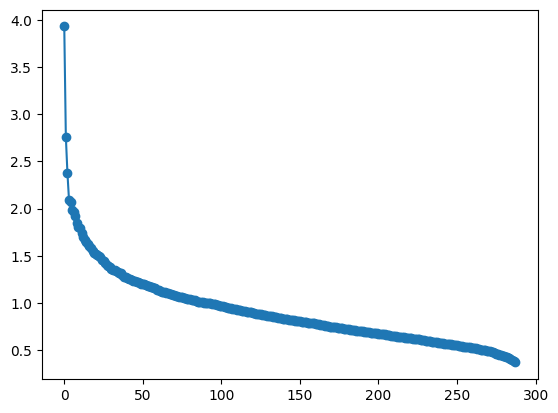

In [135]:
# plot singular values
plt.plot(s, 'o-')

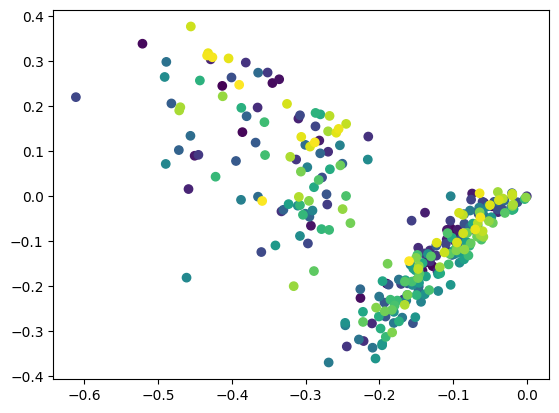

In [136]:
# use singular vecotrs for 2D representation of sentences
v1 = U_rank[:, 0]
v2 = U_rank[:, 1]
dataX1= np.dot(v1, normalized_term_sentence_matrix)
dataX2= np.dot(v2, normalized_term_sentence_matrix)
plt.scatter(dataX1, dataX2, c=np.arange(len(sentences)), cmap='viridis')


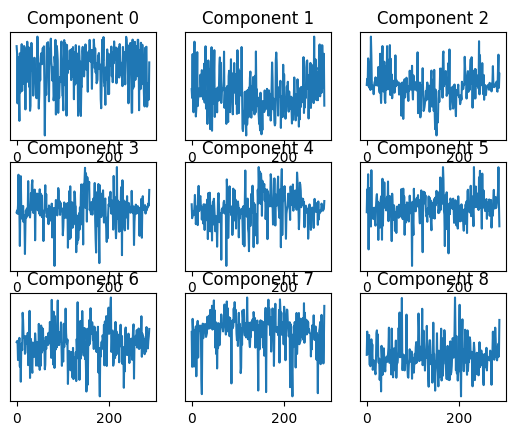

In [137]:
# get all components
component_coordinates = np.dot(U_rank.T, normalized_term_sentence_matrix)

# plot first 9 in 3x3 grid
fig, axs = plt.subplots(3, 3)
for k in range(3):
    for i in range(3):
        comp_num= k*3+i
        axs[k, i].plot(component_coordinates[comp_num, :])
        axs[k, i].set_title(f'Component {comp_num}')
        # remove axis labels
        axs[k, i].set_yticks([])

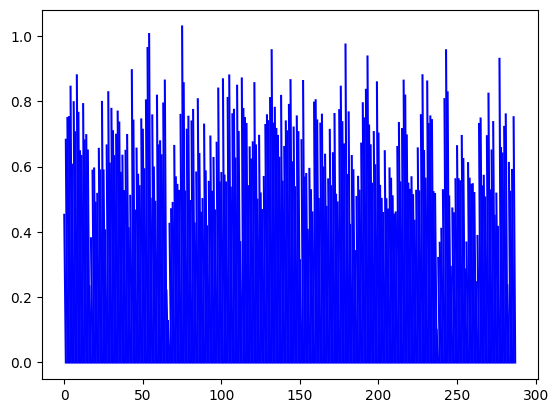

In [138]:
import matplotlib.pyplot as plt
# plot the distance between two consecutive sentences
for k in range(len(sentences)-1):
    plt.plot([k, k+1], [np.linalg.norm(term_sentence_matrix_rank[:, k] - term_sentence_matrix_rank[:, k+1]), 0], "b")

In [139]:
# implement k-means clustering
def kmeans(X, k, max_iter=100):
    n, d = X.shape
    # initialize the centroids from seed
    np.random.seed(6)
    # choose first k/2 and K/2 last points as centroids
    centroids = np.vstack([X[:k//2], X[-k//2:]])
    for _ in range(max_iter):
        # assign each point to the closest centroid
        labels = np.argmin(np.linalg.norm(X[:, None] - centroids, axis=2), axis=1)
        # update the centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        # check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels



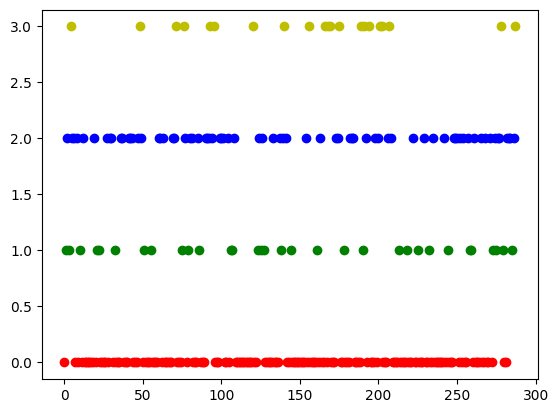

In [140]:
# plot the data with the k-means clustering
number_of_clusters = 4
labels = kmeans(term_sentence_matrix_rank.T, number_of_clusters)
colors = ['r', 'g', 'b','y','orange', 'purple']
for k in range(len(sentences)):
    plt.scatter(k, labels[k], color=colors[labels[k]])
# legend

In [141]:
# get "topics" from centroids
centroids = []
for label in range(number_of_clusters):
    centroids.append(np.mean(term_sentence_matrix_rank.T[labels == label], axis=0))

for k, centroid in enumerate(centroids):
    print("Topic", k)
    # print top 10 words
    for word, value in sorted(zip(relevant_words, centroid), key=lambda x: x[1], reverse=True)[:10]:
        print(word, value)

Topic 0
art 0.05080364046876366
men 0.05028575919858493
man 0.04552817808832291
one 0.04433750539750704
go 0.044092898643082114
red 0.04053989019721569
king 0.037060284729355006
land 0.034861422262718454
ever 0.029910102039680475
ten 0.028188255455194846
Topic 1
ran 0.19827132235808106
led 0.10257812214464207
land 0.06465196933540514
range 0.05963457070791092
us 0.059365122054930504
grant 0.05287921794227113
follow 0.04639915520141048
art 0.04521950201499901
call 0.044653659417715985
called 0.044483920958897194
Topic 2
us 0.34177551326304656
use 0.05635796477136735
men 0.034913288852857355
let 0.034787229760121934
aid 0.03328015636254572
man 0.032901693397688815
ten 0.03214044928988729
one 0.032025082834189686
timaeus 0.029000037164442043
must 0.028459324110739603
Topic 3
din 0.2659982042596242
round 0.07987787492744888
us 0.07595391387465937
men 0.06834655714499431
sea 0.06773682380386374
building 0.052997594484882275
side 0.04686597641201639
ten 0.045902565044703886
tin 0.04301807901

In [142]:
# calculate saliency scores
AAT=term_sentence_matrix_rank @term_sentence_matrix_rank.T
ATA= term_sentence_matrix_rank.T @ term_sentence_matrix_rank
u=np.linalg.eig(AAT).eigenvectors[0]
print(u.shape)
v=np.linalg.eig(ATA).eigenvectors[0]
print(v.shape)


(1595,)
(288,)


In [143]:
# show most salient words
word_saliency = {}
for k, word in enumerate(relevant_words):
    word_saliency[word] = np.linalg.norm(u[k])

print("saliency of atlantis:" , word_saliency["atlantis"])
for word in sorted(word_saliency, key=word_saliency.get, reverse=True)[:50]:
    print(word_saliency[word],"\t", word)


saliency of atlantis: 0.0005754056262650963
0.33927285818693836 	 painting
0.05983018216590047 	 people
0.05983018216590047 	 richer
0.034491622242023026 	 regulated
0.034491622242023026 	 trust
0.019248306061273122 	 raised
0.019248306061273122 	 swore
0.015201446351060539 	 sworn
0.015201446351060539 	 appear
0.01390550615119584 	 guardians
0.01390550615119584 	 point
0.013445449551370508 	 temples
0.013176718675098202 	 days
0.013176718675098202 	 power
0.012769501434609712 	 approved
0.011602549688401801 	 custom
0.011602549688401801 	 clearer
0.010879171971608146 	 consulted
0.010253598681647689 	 extraordinary
0.009641665019030592 	 supremacy
0.009641665019030592 	 anything
0.009601136736141618 	 waves
0.009601136736141618 	 artificial
0.009056659028560492 	 far
0.0076015010420249175 	 bowl
0.006361263455813438 	 civilizations
0.006359978883097041 	 side
0.006359978883097041 	 attempted
0.0062932467127102465 	 pilots
0.0062932467127102465 	 gratification
0.005432609823522822 	 sq

In [144]:
# show most salient sentences
sentence_saliency = {}
for k, sentence in enumerate(sentences):
    sentence_saliency[sentence] = np.linalg.norm(v[k])
for sentence in sorted(sentence_saliency, key=sentence_saliency.get, reverse=True):
    print(sentence_saliency[sentence])
    print(sentence)
    print("-----------------")

0.17116189845537097
and so atlantis once a beacon of glory became a lesson to all generations about the importance of humility wisdom and adherence to divine law
-----------------
0.17116189845537097
this concludes the story i have to tell as it was handed down from solon and the priests of egypt and now recounted to you as best as memory serves
-----------------
0.16842818893674213
they were moved by his words and by the fate of the once noble atlanteans who had strayed so far from their divine heritage
-----------------
0.16677457203079898
the stories we tell and the knowledge we share are the threads that weave the fabric of our understanding
-----------------
0.16677457203079898
with this in mind i am ready to take my turn and delve into the matters that concern us confident in the support and forbearance of this esteemed company
-----------------
0.15543298785979556
socrates i am honored by your words and the eloquence of my predecessors
-----------------
0.15543298785979556
the t

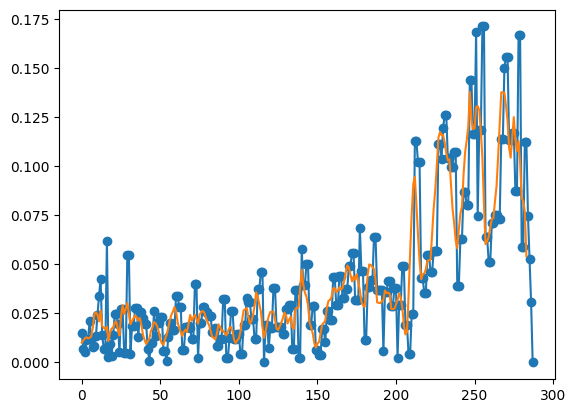

In [145]:
# plot saliency scores
plt.plot([sentence_saliency[sentence] for sentence in sentences], 'o-')
# rolling average
lookback = 5
rolling_average = np.convolve([sentence_saliency[sentence] for sentence in sentences], np.ones(lookback)/lookback, mode='valid')
plt.plot(rolling_average)


/home/bela/git/matrixmethods_dataanalysis/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/bela/git/matrixmethods_dataanalysis/.venv/lib/python3.10/site-packages/numpy/lib/histograms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/home/bela/git/matrixmethods_dataanalysis/.venv/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6865: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16


(array([1.00e+00, 0.00e+00, 0.00e+00, 2.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        2.00e+00, 4.00e+00, 4.00e+00, 1.00e+00, 4.00e+00, 5.00e+00,
        8.00e+00, 1.00e+00, 9.00e+00, 6.00e+00, 6.00e+00, 1.20e+01,
        5.00e+00, 4.00e+00, 1.20e+01, 1.10e+01, 2.00e+00, 9.00e+00,
        4.00e+00, 4.00e+00, 4.00e+00, 4.00e+00, 6.00e+00, 1.00e+01,
        0.00e+00, 7.00e+00, 8.00e+00, 0.00e+00, 6.00e+00, 4.00e+00,
        7.00e+00, 1.60e+01, 1.23e+03, 9.00e+00, 0.00e+00, 4.00e+00,
        7.00e+00, 6.00e+00, 8.00e+00, 2.00e+00, 1.00e+01, 4.00e+00,
        8.00e+00, 2.00e+00, 1.20e+01, 6.00e+00, 5.00e+00, 4.00e+00,
        2.00e+00, 1.20e+01, 6.00e+00, 4.00e+00, 8.00e+00, 4.00e+00,
        1.30e+01, 9.00e+00, 4.00e+00, 8.00e+00, 0.00e+00, 2.00e+00,
        2.00e+00, 4.00e+00, 2.00e+00, 0.00e+00, 0.00e+00, 2.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 

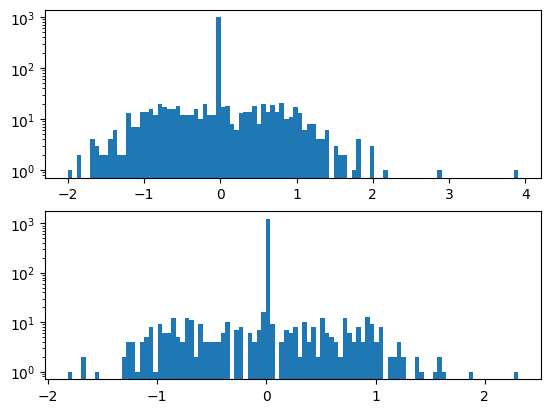

In [146]:
# calculate the follow frequency of words
split = len(sentences)//3*2
word_follow_frequency1 = np.zeros((len(relevant_words), len(relevant_words)))
word_follow_frequency2 = np.zeros((len(relevant_words), len(relevant_words)))
for sentence in sentences[:split]:
    words = sentence.split()
    for k in range(len(words)-1):
        for i in range(k+1, len(words)):
            if words[k] in relevant_words and words[i] in relevant_words:
                word_follow_frequency1[relevant_words.index(words[k]), relevant_words.index(words[i])] += 1
                break
for sentence in sentences[split:]:
    words = sentence.split()
    for k in range(len(words)-1):
        for i in range(k+1, len(words)):
            if words[k] in relevant_words and words[i] in relevant_words:
                word_follow_frequency2[relevant_words.index(words[k]), relevant_words.index(words[i])] += 1
                break

# plot the different eigenvalues as histogram with log scale
fig, axs = plt.subplots(2)

axs[0].hist(np.linalg.eig(word_follow_frequency1)[0], bins=100, log=True)
axs[1].hist(np.linalg.eig(word_follow_frequency2)[0], bins=100, log=True)
# axs[0].plot(np.linalg.eig(word_follow_frequency1)[0], 'o-')
# axs[1].plot(np.linalg.eig(word_follow_frequency2)[0], 'o-')

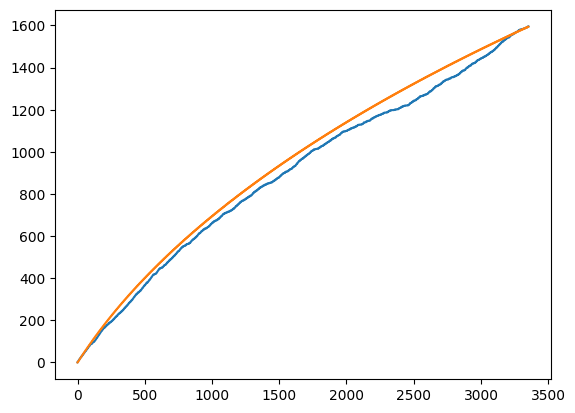

In [147]:
# another approach: look at all the unique words 
# get word sequence
word_sequence = []
for sentence in sentences:
    word_sequence += sentence.split()
word_sequence = [w for w in word_sequence if w in relevant_words]

# unique words until k
unique_words_until = []
unique_words_set = set()
for i in range(len(word_sequence)):
    unique_words_set.add(word_sequence[i])
    unique_words_until.append(len(unique_words_set))

#plot with log scale
plt.plot(unique_words_until)

# contrast with expected number (statistically, if words are drawn uniformly at random)
term_multiplicities = np.zeros(len(relevant_words))
for word in word_sequence:
    term_multiplicities[relevant_words.index(word)] += 1
# calculate expected number of unique words (formula found online: https://www.adellera.it/static_html/investigations/distinct_balls/distinct_balls.pdf)
def expected_unique_words(n, term_multiplicity):
    word_number = np.sum(term_multiplicity)
    sum=0
    for term_multiplicity in term_multiplicity:
        prod = 1
        for i in range(int(term_multiplicity)):
            prod = prod*(1-n/(word_number-i))
        sum += 1-prod
    return int(sum)

expected_unique_words_list = [expected_unique_words(i, term_multiplicities) for i in range(len(word_sequence))]
plt.plot(expected_unique_words_list)



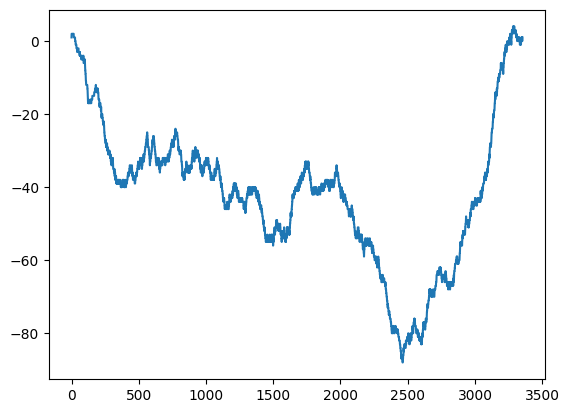

In [148]:
# plot the difference
plt.plot(np.array(unique_words_until) - np.array(expected_unique_words_list))

In [151]:
# expect split to be at minimum
split = np.argmin(np.array(unique_words_until) - np.array(expected_unique_words_list))
# find the sentence that splits the text
sentences_used = filtered_sentences
sentence_index = -1
word_counter = 0
for k in range(len(sentences_used)):
    sentence_index = k
    word_counter += len(sentences_used[k].split())
    if word_counter > split:
        break
print(sentence_index)
print(sentences[sentence_index])


209
also two horses and riders for them and a pair of chariot horses without a seat accompanied by a horseman who could fight on foot carrying a small shield and having a charioteer who stood behind the man at arms to guide the two horses
